# Task 9.1: Labelling Relevant Regions
## Starting with the ACE2 TAD (chrX:15,200,000-15,800,000) and expanding the algorithm to larger regions:
### Add labels to:
- Protein coding exons;  
- Immediate promoters;  
- Repetitive sequences;  
> - Paint LINES and ALUs opposite colours

- Non-promoter cCREs;  

### Perform a gene clustering analysis;

# Task 9.2: Continue Gene Analysis on ACE2 TAD
- Combine Segway's aggregated score, tissue expression data, and cCRE compilation to remove irrelevant cCREs:  
> Furthermore, investigate the impact of individual variations on tissue expression data

- Look into **CLTRN** (tissue-expression, COVID-19, female sex-bias, variable escape), **ASB11** (tissue-expression, male-bias, variable), and **VEGFD** (tissue-expression, vascular growth factor, female sex-bias)  

# Labels:

Label|Source|UCSC Table Browser Link
:--:|:--:|:---:
Portein coding exon|NCBI RefSeq (hg38 ncbiRefSeqCurated from UCSC Table Browser)
Immediate promoters|EDPnew, FANTOM5
Repetitive sequences|RepeatMasker, Dfam
Non-promoter cCREs|EpiRegio + Segway

## Build your own genome browser:
### [GIVE](https://zhong-lab-ucsd.github.io/GIVE_homepage/#:~:text=GIVE%20is%20an%20open%20source,build%20an%20interactive%20genome%20browser.):
> - **Publication:** https://genomebiology.biomedcentral.com/articles/10.1186/s13059-018-1470-9  
>> -  The GIVE library supports three types of data tracks: genome annotations in BED format, quantitative data in Wig/BigWig format and genome interactions in interaction matrix format.  
>> - Use [jsfiddle](https://jsfiddle.net/), an online HTML testing website for testing of your own HTML code.  

> Run html code as a website: https://www.wikihow.com/Save-a-Text-Document-as-an-HTML-File

### [UCSC Track Database Definition](https://genome.ucsc.edu/goldenPath/help/trackDb/trackDbDoc.html):
> **Additional UCSC links:**    
>> [Graphical Display of Tracks](https://genome.ucsc.edu/goldenPath/help/trackDb/trackDbHub.html)  
>> [UCSC utilities](https://genome.ucsc.edu/util.html)   
> - Genomic visualization guidelines: https://arxiv.org/pdf/1905.02853.pdf  
> - Selecting the appropriate file format: http://genomewiki.ucsc.edu/index.php/Selecting_a_graphing_track_data_format

### [Bedtools](http://quinlanlab.org/tutorials/bedtools/bedtools.html#what-are-these-files)

# UCSC Visualization:
### [Creating custom annotation tracks](https://genome.ucsc.edu/goldenPath/help/hgTracksHelp.html#IndivTracks):
- **Step 1. Format the data set:** Format your data as a tab-separated file using one of the formats supported by the Genome Browser  
- **Step 2. Define the Genome Browser display characteristics:** Add one or more optional [browser lines](https://genome.ucsc.edu/goldenPath/help/hgTracksHelp.html#lines) to the beginning of your formatted data file to configure the overall display of the Genome Browser when it initially shows your annotation data.  
- **Step 3. Define the annotation track display characteristics:** Add a [track line](https://genome.ucsc.edu/goldenPath/help/hgTracksHelp.html#TRACK) to define the display attributes for your annotation data set, such as the name, description, colors, initial display mode, use score, etc.  
- **Step 5. (Optional) Add details pages for individual track features:** You can add a link from a details page to an external web page containing additional information about the feature by using the track line *url* attribute. The url attribute substitutes each occurrence of '*$$*' in the URL string with the name defined by the name attribute.  

# [MySQL:](http://genome.ucsc.edu/goldenPath/help/mysql.html)
1. Install MariaDb (MySQL) client libraries: https://linuxize.com/post/how-to-install-mariadb-on-ubuntu-18-04/


browser position chrom:start-stop  
track type=track_type name="track_name" description="track_description"  

Variable|Example
:--:|:--:
chrom|chrX
start|15,2000,000
stop|15,800,000
track_type|bed
track_name|
track_description|

# Annotation hg38: http://hgdownload.soe.ucsc.edu/goldenPath/hg38/database/
# 1 - Protein Coding Exons:
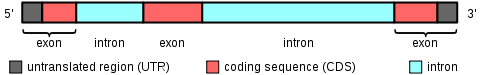

### [RefSeq Gene Prediction Tracks - UCSC](https://genome.ucsc.edu/goldenPath/help/hgTracksHelp.html#GeneDisplay):
- **Gene prediction tracks:*** Coding exons are represented by blocks connected by horizontal lines representing introns. The 5' and 3' untranslated regions (UTRs) are displayed as thinner blocks on the leading and trailing ends of the aligning regions. In full display mode, arrowheads on the connecting intron lines indicate the direction of transcription. In situations where no intron is visible (e.g. single-exon genes, extremely zoomed-in displays), the arrowheads are displayed on the exon block itself.
- **Specialized variation of the bed format:**  
> http://genome.ucsc.edu/goldenPath/help/trackDb/trackDbLibrary.shtml#  

- **RefSeq Annotation:** https://www.ncbi.nlm.nih.gov/books/NBK50679/#RefSeqFAQ.what_is_a_reference_sequence_r
> - Accession numbers begin with the prefix XM_ (mRNA), XR_ (non-coding RNA), and XP_ (protein): https://www.ncbi.nlm.nih.gov/books/NBK21091/table/ch18.T.refseq_accession_numbers_and_mole/?report=objectonly
> - Add UTR information: http://genomewiki.ucsc.edu/index.php/Genes_in_gtf_or_gff_format
>> - https://mblab.wustl.edu/GTF22.html  
>> - Visualization with colour for exons, utr, etc. example: http://genoviz.sourceforge.net/release_notes/data/GFF1_example.gff

- **Gencode v32 Annotation:** https://www.gencodegenes.org/pages/tags.html

**From GTF format:**  
- Attribute a score in the 6th column (**score**) according to values in the 3rd column (**feature: exon, 5UTR, CDS, transcript, etc.**):  
> - Required feature types: "CDS", "start_codon", "stop_codon".  
> - Optional feature types: "5UTR", "3UTR", "inter", "inter_CNS", "intron_CNS" and "exon".  

- Label only relevant distinctions: CDS (**translated exons**), 5UTR/3UTR/exon (**untranslated exons**)
> -  While gene_id & transcript_id match: 
>> - If only contains "transcript" "exon", copy all
>> - Else, copy only rows with column $3 as "CDS", "3UTR", "5UTR"  

> - 1) Count number of lines (**lines**) and start at k=1, i=1:
>> - While (k <= lines); if exond_id(k)=exon_id(i+1); i++;
>> - While exon; if exon_start - *next* == 0 && exon_end - *next* == 0, delete exon
>> - Else exon_start = exon_start-next_start & exon_end=next_end-exon_end

GTF Field|Definition
:--:|:--:
**seqname**|Chromosome or contig ID
**source**|Public database or prediction program
**feature**|*See below*
**start** and **end**|Integer start and end coordinates of the feature
**score**|May be attributed a floating point number, integer, or replaced with a dot
**frame**|0 indicates that the feature begins with a whole codon at the 5' most base. 1 means that there is one extra base (the third base of a codon) before the first whole codon and 2 means that there are two extra bases (the second and third bases of the codon) before the first codon. Note that for reverse strand features, the 5' most base is the <end> coordinate
**attributes**|Two mandatory attributes: ***gene_id value***;     A globally unique identifier for the genomic locus of the transcript. If empty, no gene is associated with this feature. ***transcript_id value***;     A globally unique identifier for the predicted transcript. If empty, no transcript is associated with this feature.

Feature|Definition|Classification|Score
:--:|:--:|:--:|:--:
**CDS**|Coding sequence from the first translated codon to the last translated codon.|Protein-coding exon|900
**exon**|Exon boundaries will be the transcription start site, splice donor, splice acceptor and poly-adenylation site. The start or stop codon will not necessarily lie on an exon boundary.
**start_codon**|Up to 3bp long in total and is included in the coordinates for the "CDS" features. 
**stop_codon**|Up to 3bp long and is excluded from the coordinates for the "3UTR" features, if used.
**5UTR**|Regions from the transcription start site or beginning of the known 5' UTR to the base before the start codon of the transcript. If this region is interrupted by introns then each exon or partial exon is annotated as a separate 5UTR feature.|Non protein-coding exon|300
**3UTR**|Regions after the stop codon and before the polyadenylation site or end of the known 3' untranslated region.|Non protein-coding exon|300
**inter**|Intergenic region that is not transcribed.
**inter_CNS**|Intergenic conserved noncoding sequence region.
**intron_CNS**|Conserved noncoding sequence region within an intron of a transcript.

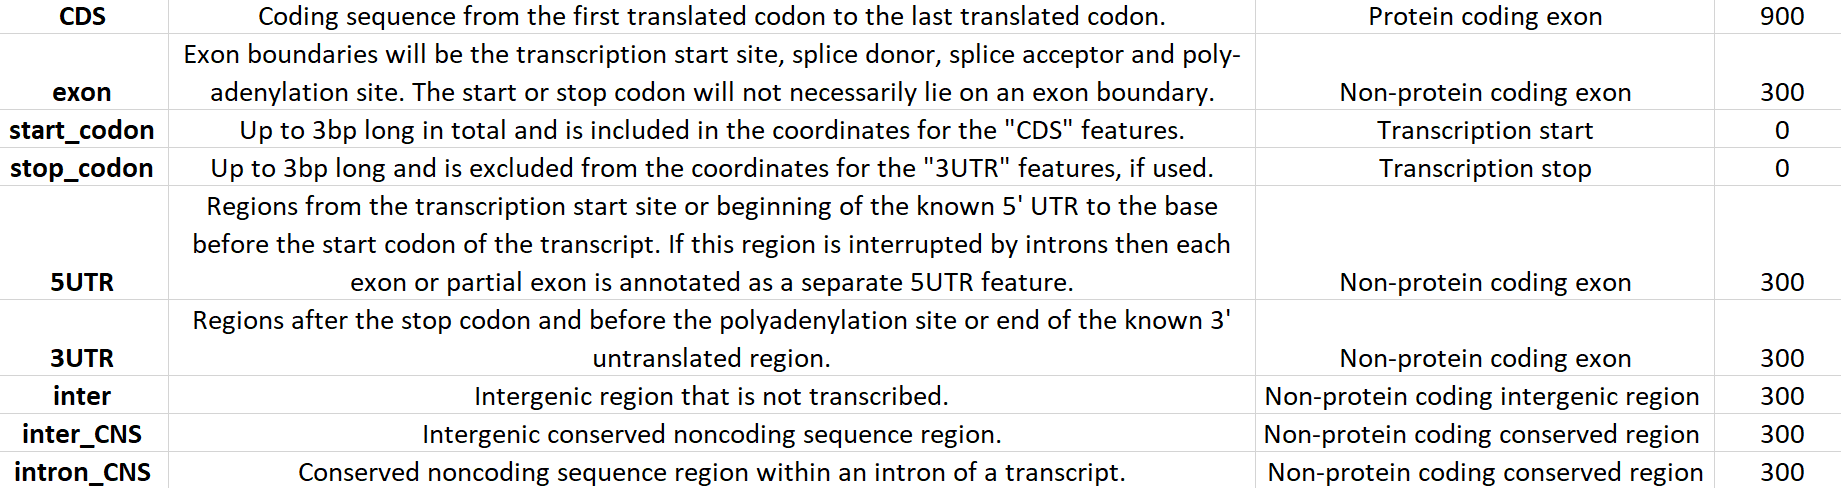
> **Note:** For GTF files, UCSC allows using the scores in the range 1-1000 to determine color shading but restritcs this to certain colors, including 0,60,120 and 100,50,0.

# Command Line Tools:
- Import UCSC utilities: rsync -aP rsync://hgdownload.soe.ucsc.edu/genome/admin/exe/linux.x86_64/ ./  
- Enable execution: sudo chmod +x **tool_name**  
- Run: ./**tool_name** *[options]* *[files]*

## Useful Bash TSV Operations:
**Retrieve gene id and transcript id for grouping:** cut -f 9 hg38.knownGene.gtf | cut -f 1,2 -d ";"
**Convert space delimiter to tab delimiter:** sed 's/ \+/\t/g8' hg38.knownGene_shaded_X.gtf > hg38_X.knownGene_shaded.gtf (**8 for 8th occurence**)
**Filter a GTF overlap to remove exons when exon is annotated:** https://rdrr.io/bioc/GeneStructureTools/man/filterGtfOverlap.html  

1) Group according to gene_id and transcript_id;  
2) Attribute score based on label;  
3) Build bed: *Start with #chr, chromStart, and chromEnd;*  
4) Conver to tab-delimited file;  
5) Filter for chrX;  

# MongoDB vs. MySQL:
## MongoDB:
- MongoDB belongs to the family of NoSQL databases which is used for storing unstructured documents in JSON format.  
- In MongoDB, data is stored in collections that are analogous to MySQL tables. A collection can consist of many documents in which data is stored in JSON format of key-value. 

## MySQL:
- MySQL is an open-source SQL relational database, which is used for storing structured data in a table-like format.  
- In MySQL, the data is stored in tables, where the column denotes the attribute and row represents a particular record.  
- The SQL databases have a relational property where different tables are related to each other with foreign keys, primary keys.  
- **Tutorials:**  
1) https://dev.mysql.com/doc/refman/8.0/en/tutorial.html  
2) https://www3.ntu.edu.sg/home/ehchua/programming/sql/MySQL_Beginner.html  
3) https://www.mysqltutorial.org/mysql-insert-into-select/#:~:text=The%20following%20illustrates%20the%20syntax,from%20one%20or%20more%20tables.  

> - Connect to that server by invoking mysql: **sudo mysql**  
> - Disconnect: **QUIT**  
> - Create and use database: CREATE x; USE x; *or* sudo mysql -h host -u user -p x  
> - Create table: CREATE TABLE table (field1 VARCHAR(20), field2 VARCHAR(20), field3 VARCHAR(20), field4 CHAR(1), field5 DATE, field6 DATE);  
> - Show tables and content: SHOW TABLES; DESCRIBE table;   
> - Populate it using the LOAD DATA and INSERT statements: Create a text file containing one record per line, with values separated by tabs, and given in the order in which the columns were listed in the CREATE TABLE statement. For missing values, write "\N".  
>> - LOAD DATA LOCAL INFILE '/path/file.txt' INTO TABLE table;  
>> - INSERT INTO table VALUES ('x','x','x','x','x',NULL);  
>> - Pull data: SELECT what_to_select FROM which_table WHERE conditions_to_satisfy;  
> - Empty the table: DELETE FROM table;  
> - Fix single entries: UPDATE table SET field = 'x' WHERE field2 = 'y';  

- In MySQL, 0 or NULL means false and anything else means true. The default truth value from a boolean operation is 1.  
### Connecting tables by key:
>> - SELECT table1.commobKey, remark FROM table1 INNER JOIN table2 ON table1.commobKey = table2.commobKey WHERE condition;
### Connecting to UCSC:
>> - sudo mysql --user=genome --host=genome-mysql.soe.ucsc.edu -A  
>> - SHOW DATABASES;  
>> - USE hg38;  
>> - SHOW TABLES;

# Coding and Noncoding Regions: 
> - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1838437/  
> - https://www.ncbi.nlm.nih.gov/tools/gbench/manual10/#gene-mrna-cds  
>- http://www.insdc.org/documents/feature-table#7.2

# TAD Step-By-Step Procedure:
1) Download GTF file:  
- Go to UCSC Table Browser: Mammal/Human/hg38 -> Gene and Gene Predictions -> NCBI RefSeq Curated -> chrX:15,200,000-15,800,000 -> BED  
- Uncheck "include custom track header"  
- Get on BED record per: introns plus, 5' UTR, coding, and 3' UTR exons (save all to the same directory, e.g. hg38.NCBIRefSeqCurated)  
>> Naming convention: ucscId_sequenceType_sequenceTypeNumber_basesAdded_chromosome_positionOfFirstBaseOfItem_strand  
- Manipulate data using UCSC utilities and others:  
>> 1) Merge all 4 bed files into one;  
>> 2) Access and manipulate UCSC MySql tables: http://genome.ucsc.edu/blog/tag/downloads/  


2) Linking accession number with other information:  
> - If you are looking at the RefSeq Genes, the refFlat table contains both the gene name (usually a HUGO Gene Nomenclature Committee ID) and its accession number.  
> - Description of the NCBI RefSeqLink table: http://biomirror.aarnet.edu.au/biomirror/ncbigenomes/README_GFF3.txt  
>> - gbkey and ncrna_class: http://www.insdc.org/files/feature_table.html#7.2  
>> - **Note**: Transcribed genes might have both protein-coding and non-coding transcript variants and protein isoforms.  

# Re-do:
- Only get bed file for introns (plus 1 at chromStart);  
- Remove all "exons" from ncbiRefSeq.gtf file (i.e. keep transcript, CDS, 5UTR, 3UTR, start_codon, stop_codon);  
>> Merge both files together!